In [55]:
import numpy as np
np.set_printoptions(linewidth=120)

1. 写出共轭梯度法的 MATLAB 版本，并使用该程序求解如下系统:
$$
(a)\;
\begin{bmatrix}1&0\\0&2\end{bmatrix}
\begin{bmatrix}u\\v\end{bmatrix}=
\begin{bmatrix}2\\4\end{bmatrix}\\
\,\\
(b)\;
\begin{bmatrix}1&2\\2&5\end{bmatrix}
\begin{bmatrix}u\\v\end{bmatrix}=
\begin{bmatrix}1\\1\end{bmatrix}
$$

In [77]:
def ConjugateGradient(A, b, check=False, printOrNot=True, tolerance=0.):
    n = A.shape[0]
    print("Conjugate Gradient Method with n=", n)
    x = np.zeros(n)
    r = b.copy()
    d = r.copy()

    errors = []
    for i in range(n):
        nrm = np.linalg.norm(r, np.inf)
        errors.append(nrm)
        if printOrNot:
            print(f"Iter of {i+1:2}/{n:2}: inf-norm of r: {nrm}")
        if  nrm <= tolerance:
            print("Break on iter of", i+1)
            break
        rr = r@r
        alpha = rr/(d@A@d)
        x = x+alpha*d
        r = r-alpha*(A@d)
        beta = r@r/rr
        d = r+beta*d
    print(f"         Final inf-norm of r: {np.linalg.norm(r, np.inf)}")
    if check:
        if printOrNot:
            print("    x:", x)
        print("    error norm:", np.linalg.norm(A@x-b, np.inf))
    return (x, errors)

x,_ = ConjugateGradient(np.array([[1,0],[0,2]]), np.array([2,4]), True)
x,_ = ConjugateGradient(np.array([[1,2],[2,5]]), np.array([1,1]), True)

Conjugate Gradient Method with n= 2
Iter of  1/ 2: inf-norm of r: 4.0
Iter of  2/ 2: inf-norm of r: 0.8888888888888888
         Final inf-norm of r: 1.6653345369377348e-16
    x: [2. 2.]
    error norm: 0.0
Conjugate Gradient Method with n= 2
Iter of  1/ 2: inf-norm of r: 1.0
Iter of  2/ 2: inf-norm of r: 0.40000000000000013
         Final inf-norm of r: 3.497202527569243e-15
    x: [ 3. -1.]
    error norm: 2.6645352591003757e-15


2. 使用 MATLAB 版本的共轭梯度法，求解如下问题:
$$
(a)\;
\begin{bmatrix}1&-1&0\\-1&2&1\\0&1&2\end{bmatrix}
\begin{bmatrix}u\\v\\w\end{bmatrix}=
\begin{bmatrix}0\\2\\3\end{bmatrix}\\
\,\\
(b)\;
\begin{bmatrix}1&-1&0\\-1&2&1\\0&1&5\end{bmatrix}
\begin{bmatrix}u\\v\\w\end{bmatrix}=
\begin{bmatrix}3\\-3\\4\end{bmatrix}\\
$$

In [78]:
x,_ = ConjugateGradient(np.array([[1,-1,0],[-1,2,1],[0,1,2]]), np.array([0,2,3]), True)
x,_ = ConjugateGradient(np.array([[1,-1,0],[-1,2,1],[0,1,5]]), np.array([3,-3,4]), True)

Conjugate Gradient Method with n= 3
Iter of  1/ 3: inf-norm of r: 3.0
Iter of  2/ 3: inf-norm of r: 0.6842105263157895
Iter of  3/ 3: inf-norm of r: 0.1132075471698113
         Final inf-norm of r: 9.853229343548264e-16
    x: [1. 1. 1.]
    error norm: 8.881784197001252e-16
Conjugate Gradient Method with n= 3
Iter of  1/ 3: inf-norm of r: 4.0
Iter of  2/ 3: inf-norm of r: 1.7227722772277234
Iter of  3/ 3: inf-norm of r: 0.18876361733504587
         Final inf-norm of r: 3.427813588530171e-15
    x: [ 2. -1.  1.]
    error norm: 3.552713678800501e-15


3. 使用共轭梯度法求解系统 $Hx=b$,其中 $H$ 是 $n\times n$ 希尔伯特矩阵, $b$ 是全为1的向量，(a)n=4, (b)n=8.

In [79]:
import scipy as sp
x,_ = ConjugateGradient(sp.linalg.hilbert(4), np.ones(4), True)
x,_ = ConjugateGradient(sp.linalg.hilbert(8), np.ones(8), True)

Conjugate Gradient Method with n= 4
Iter of  1/ 4: inf-norm of r: 1.0
Iter of  2/ 4: inf-norm of r: 0.6416510318949342
Iter of  3/ 4: inf-norm of r: 0.1313523119923406
Iter of  4/ 4: inf-norm of r: 0.017947305142676968
         Final inf-norm of r: 1.5179084781637153e-09
    x: [  -4.   60. -180.  140.]
    error norm: 1.5179182355495868e-09
Conjugate Gradient Method with n= 8
Iter of  1/ 8: inf-norm of r: 1.0
Iter of  2/ 8: inf-norm of r: 1.05006227171399
Iter of  3/ 8: inf-norm of r: 0.20669054464563383
Iter of  4/ 8: inf-norm of r: 0.0685145362587323
Iter of  5/ 8: inf-norm of r: 0.013104517253059111
Iter of  6/ 8: inf-norm of r: 0.0017842838819626997
Iter of  7/ 8: inf-norm of r: 1.3200608821123345
Iter of  8/ 8: inf-norm of r: 0.0003580280747882969
         Final inf-norm of r: 0.00037457994775650207
    x: [   -5.64866393   153.38773204  -873.60128993  1378.10751732   335.71392672 -1242.26504186 -1156.48123908
  1453.93314816]
    error norm: 0.0003745799477314904


4. 使用共轭梯度法求解(2.45, 如下)的稀疏问题.(a)n=6, (b)n=12.
$$
A=
\begin{bmatrix}
 3&-1& 0& 0& 0&\frac12\\
-1& 3&-1& 0&\frac12& 0\\
 0&-1& 3&-1& 0& 0\\
 0& 0&-1& 3&-1& 0\\
 0&\frac12& 0&-1& 3&-1\\
\frac12& 0& 0& 0&-1& 3\\
\end{bmatrix}
$$

In [80]:
def Solution4(n, printOrNot=True, tol=0.):
    A = sp.sparse.lil_matrix((n, n))
    A.setdiag(3, k=0)
    A.setdiag(-1, k=1)
    A.setdiag(-1, k=-1)
    for i in range(n//2-1):
        A[n-1-i, i] = 0.5
        A[i, n-1-i] = 0.5
    if printOrNot:
        print(A.toarray())
    b = np.full((n,), 1.5)
    b[0] = 2.5
    b[-1] = 2.5
    b[n//2-1] = 1.
    b[n//2] = 1.
    if printOrNot:
        print(b)
    x,_ = ConjugateGradient(A, b, True, printOrNot, tol)

Solution4(6)
Solution4(12)

[[ 3.  -1.   0.   0.   0.   0.5]
 [-1.   3.  -1.   0.   0.5  0. ]
 [ 0.  -1.   3.  -1.   0.   0. ]
 [ 0.   0.  -1.   3.  -1.   0. ]
 [ 0.   0.5  0.  -1.   3.  -1. ]
 [ 0.5  0.   0.   0.  -1.   3. ]]
[2.5 1.5 1.  1.  1.5 2.5]
Conjugate Gradient Method with n= 6
Iter of  1/ 6: inf-norm of r: 2.5
Iter of  2/ 6: inf-norm of r: 0.7764705882352941
Iter of  3/ 6: inf-norm of r: 0.4122965641952984
Iter of  4/ 6: inf-norm of r: 1.6653345369377348e-16
Iter of  5/ 6: inf-norm of r: 4.777599081378746e-17
Iter of  6/ 6: inf-norm of r: 1.503559181920928e-17
         Final inf-norm of r: 9.617992879911003e-19
    x: [1. 1. 1. 1. 1. 1.]
    error norm: 8.881784197001252e-16
[[ 3.  -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.5]
 [-1.   3.  -1.   0.   0.   0.   0.   0.   0.   0.   0.5  0. ]
 [ 0.  -1.   3.  -1.   0.   0.   0.   0.   0.   0.5  0.   0. ]
 [ 0.   0.  -1.   3.  -1.   0.   0.   0.   0.5  0.   0.   0. ]
 [ 0.   0.   0.  -1.   3.  -1.   0.   0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   

5. 使用共轭梯度法求解(2.45)，n=100，1000以及10 000. 报告最后余项的规模，以及所需的迭代步数.

In [64]:
Solution4(100, False)
Solution4(10000, False, 1e-15)

Conjugate Gradient Method with n= 100
         Final inf-norm of r: 1.4626743255412333e-50
    error norm: 1.7763568394002505e-15
Conjugate Gradient Method with n= 10000
Break on iter of 33
         Final inf-norm of r: 7.23816429635465e-16
    error norm: 1.5543122344752192e-15


6. 令 $A$ 是 $n\times n$ 矩阵，n=1000,元素 $A(i,i)=i, A(i,i+1)=A(i+1,i)=1/2,A(i,i+2)=A(i+2,i)=1/2$.(a)使用 ***spy(A)***，打印非零结构.(b)令 $x_e$,是n个1组成的向量.令 $b=Ax_e$，并使用没有预条件子的共轭梯度法和雅可比预条件子，以及高斯-塞德尔预条件子求解. 在图中比较三种方法相对于步数的运行结果误差.

In [84]:
n = 1000
A = sp.sparse.diags(np.arange(1, 1001), format='lil')
A.setdiag(0.5, k=1)
A.setdiag(0.5, k=-1)
A.setdiag(0.5, k=2)
A.setdiag(0.5, k=-2)
print(A[:10, :10].toarray())
b = A@np.ones(n)
_, err_CG = ConjugateGradient(A, b, check=True, printOrNot=False, tolerance=1e-20)

[[ 1.   0.5  0.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.5  2.   0.5  0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.5  0.5  3.   0.5  0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.5  0.5  4.   0.5  0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.5  0.5  5.   0.5  0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.5  0.5  6.   0.5  0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.5  0.5  7.   0.5  0.5  0. ]
 [ 0.   0.   0.   0.   0.   0.5  0.5  8.   0.5  0.5]
 [ 0.   0.   0.   0.   0.   0.   0.5  0.5  9.   0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.5  0.5 10. ]]
Conjugate Gradient Method with n= 1000
Break on iter of 339
         Final inf-norm of r: 8.831602396721215e-21
    error norm: 2.1600499167107046e-12


In [85]:
def PreconditionerJacobi(A, b, check=False, printOrNot=True, tolerance=0.):
    n = A.shape[0]
    print(f"Conjugate Gradient Method(Jacobi precond) with n={n}")
    x = np.zeros(n)
    r = b.copy()
    MInverse = sp.sparse.diags(1./A.diagonal(), format='lil') # Inversion of D
    z = MInverse@r
    d = z.copy()

    errors = []
    for i in range(n):
        nrm = np.linalg.norm(r, np.inf)
        errors.append(nrm)
        if printOrNot:
            print(f"Iter of {i+1:2}/{n:2}: inf-norm of r: {nrm}")
        if  nrm <= tolerance:
            print("Break on iter of", i+1)
            break
        rz = r@z
        alpha = rz/(d@A@d)
        x = x+alpha*d
        r = r-alpha*(A@d)
        z = MInverse@r
        beta = r@z/rz
        d = z+beta*d
    print(f"         Final inf-norm of r: {np.linalg.norm(r, np.inf)}")
    if check:
        if printOrNot:
            print("    x:", x)
        print("    error norm:", np.linalg.norm(A@x-b, np.inf))
    return (x, errors)

_, err_Jacobi = PreconditionerJacobi(A, b, check=True, printOrNot=False, tolerance=1e-20)

Conjugate Gradient Method(Jacobi precond) with n=1000
Break on iter of 21
         Final inf-norm of r: 4.5388239690297984e-21
    error norm: 4.547473508864641e-13


In [86]:
def PreconditionerGS(A, b, check=False, printOrNot=True, tolerance=0.):
    n = A.shape[0]
    print(f"Conjugate Gradient Method(Gauss-Seidel precond) with n={n}")
    x = np.zeros(n)
    r = b.copy()

    U = sp.sparse.triu(A, k=1, format='lil')
    L = sp.sparse.tril(A, k=-1, format='lil')
    diag = A.diagonal()
    D = sp.sparse.diags(diag, format='lil')
    DInverse = sp.sparse.diags(1/diag, format='lil')
    MLeft = sp.sparse.diags(np.ones(n), format='lil')+L@DInverse
    MRight = D+U

    # Equal to z = MInverse@r
    # M(=MLeft*MRight)'s inverse is not easy to calculate, so backsubstitution adopted.
    temp = sp.sparse.linalg.spsolve_triangular(MLeft, r, lower=True)
    z = sp.sparse.linalg.spsolve_triangular(MRight, temp, lower=False)

    d = z.copy()

    errors = []
    for i in range(n):
        nrm = np.linalg.norm(r, np.inf)
        errors.append(nrm)
        if printOrNot:
            print(f"Iter of {i+1:2}/{n:2}: inf-norm of r: {nrm}")
        if  nrm <= tolerance:
            print("Break on iter of", i+1)
            break
        rz = r@z
        alpha = rz/(d@A@d)
        x = x+alpha*d
        r = r-alpha*(A@d)

        # Equal to z = MInverse@r
        temp = sp.sparse.linalg.spsolve_triangular(MLeft, r, lower=True)
        z = sp.sparse.linalg.spsolve_triangular(MRight, temp, lower=False)

        beta = r@z/rz
        d = z+beta*d
    print(f"         Final inf-norm of r: {np.linalg.norm(r, np.inf)}")
    if check:
        if printOrNot:
            print("    x:", x)
        print("    error norm:", np.linalg.norm(A@x-b, np.inf))
    return (x, errors)

_, err_GS = PreconditionerGS(A, b, check=True, printOrNot=False, tolerance=1e-20)

Conjugate Gradient Method(Gauss-Seidel precond) with n=1000
Break on iter of 12
         Final inf-norm of r: 5.23607429135114e-22
    error norm: 4.547473508864641e-13


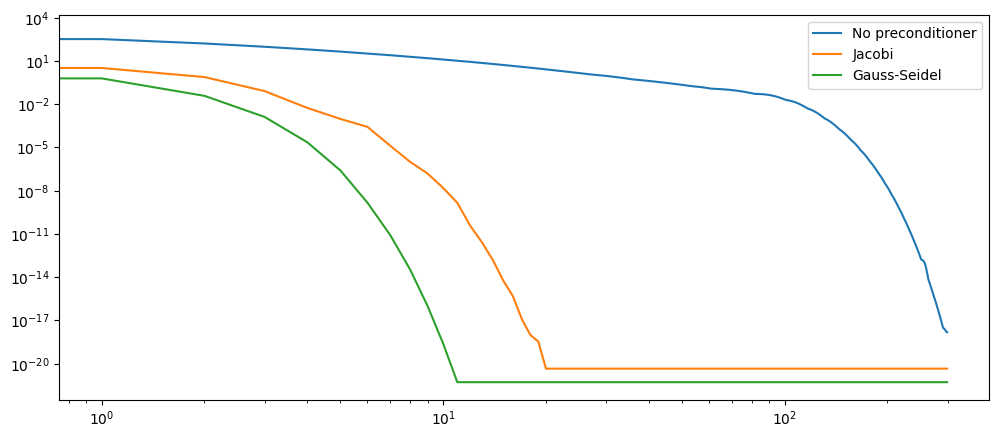

In [93]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 5))
ax.loglog(range(300), err_CG[:300], label='No preconditioner')
ax.loglog(range(300), np.hstack((err_Jacobi, np.full(300-len(err_Jacobi), err_Jacobi[-1]))), label='Jacobi')
ax.loglog(range(300), np.hstack((err_GS, np.full(300-len(err_GS), err_GS[-1]))), label='Gauss-Seidel')
_ = ax.legend()

7. 令n=1000.使用编程问题6中的 $n\times n$ 矩阵A,并加上非零元素 $A(i,2i)=A(2i,i)=1/2,1\leqslant i\leqslant n/2$.
完成问题6中的步骤(a)和(b).

8. 令n=500,令A是 $n\times n$ 矩阵，对于所有i,元素 $A(i,i)=2,A(i,i+2)=A(i+2,i)=1/2，A(i,i+4)=A(i+4,i)=1/2$, 并且 $A(500,i)=A(i,500)=-0.1, 1\leqslant i\leqslant 495$. 完成问题6中的(a)和(b).

9. 令A为编程问题8中的矩阵，但是对角线元素替换为 $A(i,i)=\sqrt[3]i$. 完成问题8的(a)和(b)部分

10. 令C是 $195\times 195$ 矩阵块，其中对于所有的 $i, C(i,i)=2, C(i,i+3)=C(i+3,i)=0.1, C(i,i+39)=C(i+39,i)=1/2, C(i,i+42)=C(i+42,i)=1/2$.定义A是 $n\times n$ 矩阵 $n=780$, 矩阵的对角线由4个对角矩阵块C组成，并在上三角和下三角矩阵中放置矩阵块 $\frac12 C$.完成问题6的(a)和(b)步骤，并求解 $Ax=b$.